<h2>Classification Problems</h2>

Dataset 1 

The company was asked to devise a machine learning model that can classify fruit based on quantitative features, such as weight and size.  We need to build a preliminary model that can classify apple vs. non-apple on a small example dataset. The dataset has about 400 entries including apples, oranges, and lemons. The columns of the dataset indicate the class of the entry (apple, orange, or lemon), the weight, width, length, and a colour-score which is an unspecified value indicating the colour of the fruit.

Dataset 2 (link: https://osf.io/n752f/)

The company was asked to determine how accurately it is possible to identify dyslexic individuals based on a small publicly available dataset.

In [ ]:
# Importing libraries
%matplotlib inline
!pip install openpyxl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Classifiers
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# Data split 
from sklearn.model_selection import train_test_split
# Evaluation tools
from sklearn.metrics import ConfusionMatrixDisplay
# Metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Color maps
from matplotlib.colors import ListedColormap

<h4>Fruit database: exploratory analysis</h4>

   fruit_label fruit_name  weight  width  height  color_score
0            1      apple     192    8.4     7.3         0.55
1            1      apple     180    8.0     6.8         0.59
2            1      apple     176    7.4     7.2         0.60
3            1      apple     178    7.1     7.8         0.92
4            1      apple     172    7.4     7.0         0.89
       fruit_label      weight       width      height  color_score
count   399.000000  399.000000  399.000000  399.000000   399.000000
mean      1.751880  166.466165    7.526566    7.482707     0.667569
std       0.830384   18.234052    0.483856    0.483784     0.136766
min       1.000000  116.000000    5.800000    6.800000     0.390000
25%       1.000000  153.000000    7.200000    7.100000     0.560000
50%       2.000000  166.000000    7.500000    7.500000     0.670000
75%       2.500000  180.000000    7.900000    7.700000     0.770000
max       3.000000  216.000000    8.400000   10.500000     0.930000
            weig

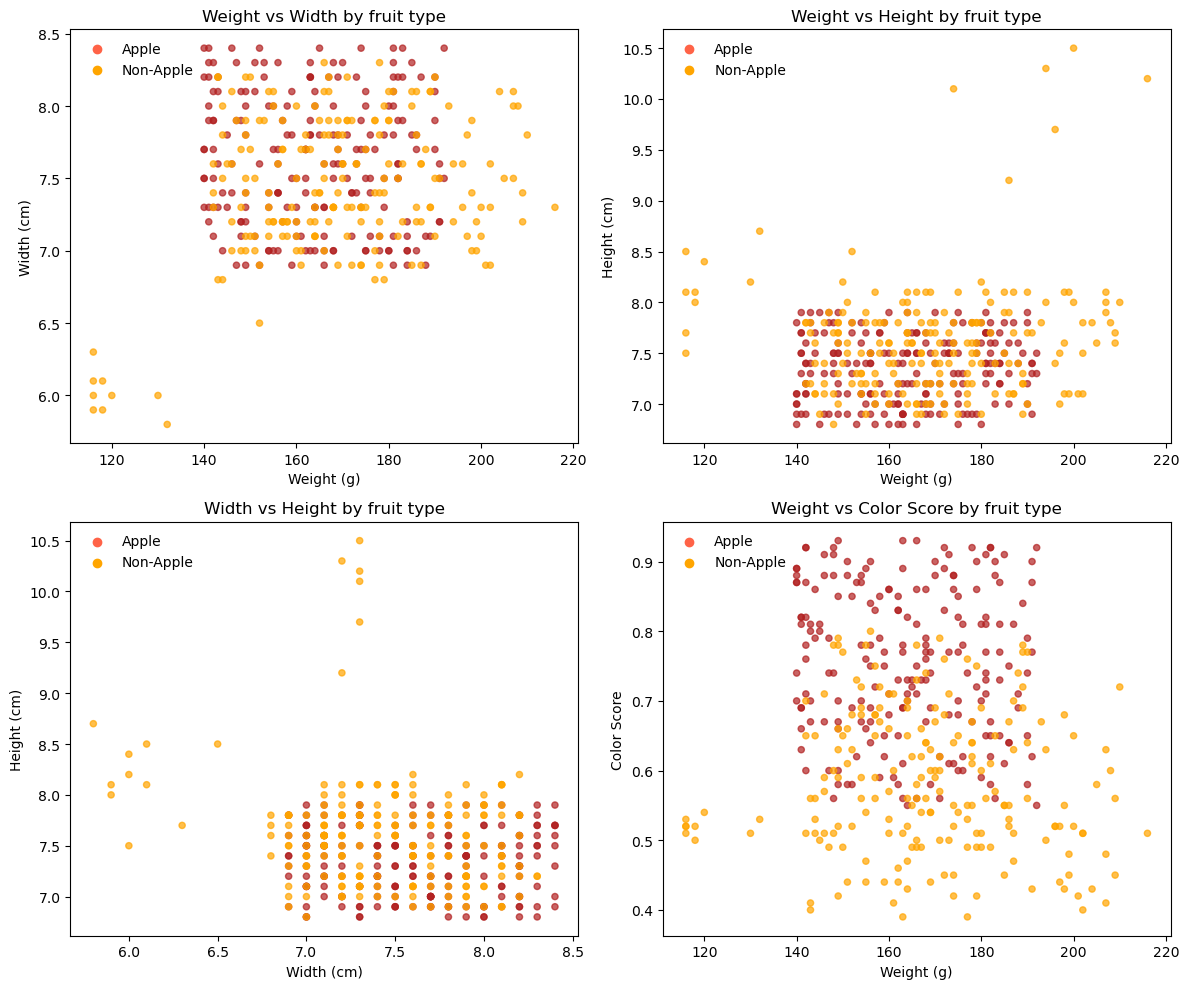

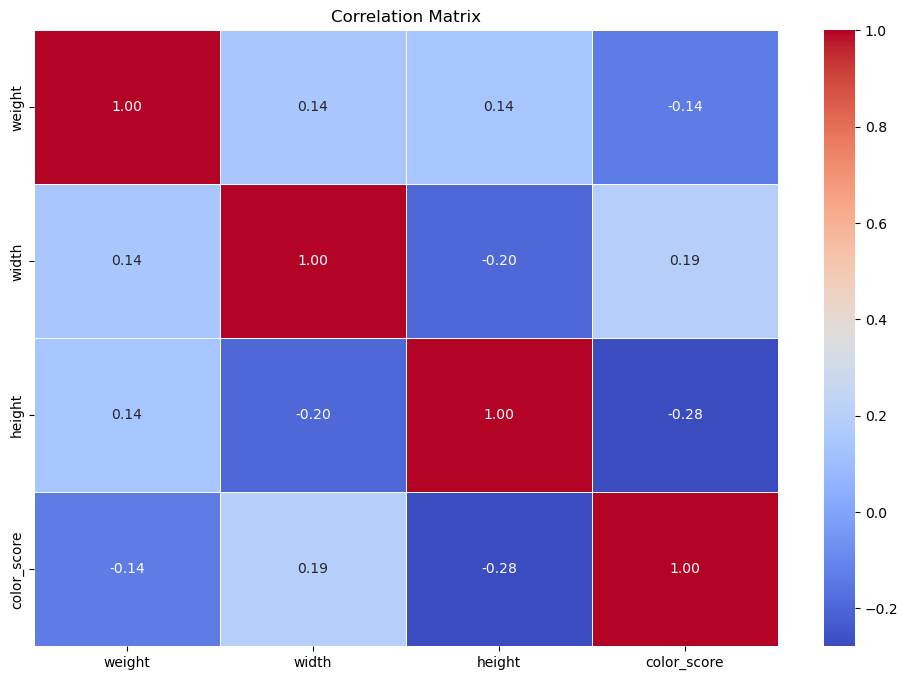

In [28]:
#Load the dataset
dataset = pd.read_csv("path/to/your/fruits.csv")

# Explore the dataset
print(dataset.head()) 
print(dataset.describe())

# Summarize continuous variables by type of fruit
print(dataset.groupby('fruit_name')[['weight', 'width', 'height', 'color_score']].mean().round(1))

# Create a numeric binary variable: Apple vs Other
dataset['apple_vs_other'] = dataset['fruit_name'].apply(lambda x: 1 if x == 'apple' else 0)

# Check the result
print(dataset[['fruit_name']].value_counts())
print(dataset[['apple_vs_other']].value_counts())

# Summarize continuous variables by type of fruit
print(dataset.groupby('fruit_name')[['weight', 'width', 'height', 'color_score']].mean().round(1))

# Data exploration revealed no missing values. 
# Apples weight less, are wider, less tall, and darker (color_score is undefined, 
#however lemons are lighter than oranges, so the direction is clear)

# Scatterplots 
# Color scheme is plotted against weight (width, height omitted) as a proxy for size.
# There was no need to plot against all variables. 

# Create a 2x2 grid for the subplots
plt.figure(figsize=(12, 10))

# Scatterplot for Weight vs Width
plt.subplot(2, 2, 1) 
colors = dataset['apple_vs_other'].map({1: 'firebrick', 0: 'orange'})  
plt.scatter(dataset['weight'], dataset['width'], c=colors, alpha=0.7, s=20)
plt.scatter([], [], c='tomato', label='Apple')  
plt.scatter([], [], c='orange', label='Non-Apple')  
plt.legend(frameon=False, loc="upper left")
plt.xlabel('Weight (g)')
plt.ylabel('Width (cm)')
plt.title('Weight vs Width by fruit type')

# Scatterplot for Weight vs Height
plt.subplot(2, 2, 2) 
colors = dataset['apple_vs_other'].map({1: 'firebrick', 0: 'orange'}) 
plt.scatter(dataset['weight'], dataset['height'], c=colors, alpha=0.7, s=20)
plt.scatter([], [], c='tomato', label='Apple')  
plt.scatter([], [], c='orange', label='Non-Apple')  
plt.legend(frameon=False, loc="upper left")
plt.xlabel('Weight (g)')
plt.ylabel('Height (cm)')
plt.title('Weight vs Height by fruit type')

# Scatterplot for Width vs Height
plt.subplot(2, 2, 3)  
colors = dataset['apple_vs_other'].map({1: 'firebrick', 0: 'orange'}) 
plt.scatter(dataset['width'], dataset['height'], c=colors, alpha=0.7, s=20)
plt.scatter([], [], c='tomato', label='Apple')  
plt.scatter([], [], c='orange', label='Non-Apple')  
plt.legend(frameon=False, loc="upper left")
plt.xlabel('Width (cm)')
plt.ylabel('Height (cm)')
plt.title('Width vs Height by fruit type')

# Scatterplot for Color Score vs Weight
plt.subplot(2, 2, 4) 
colors = dataset['apple_vs_other'].map({1: 'firebrick', 0: 'orange'})  
plt.scatter(dataset['weight'], dataset['color_score'], c=colors, alpha=0.7, s=20)  
plt.scatter([], [], c='tomato', label='Apple')  
plt.scatter([], [], c='orange', label='Non-Apple')  
plt.legend(frameon=False, loc="upper left")
plt.xlabel('Weight (g)')
plt.ylabel('Color Score')
plt.title('Weight vs Color Score by fruit type')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

# Calculate the correlation matrix
corr_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

<h4> Binary Classifier </h4>


Logistic Regression 
Number of mislabeled points in the training set: 65
Number of mislabeled points in the testing set: 16
Training score:  0.782608695652174
Testing score:  0.84

Classification Metrics:
Accuracy: 0.8400
Precision: 0.8800
Recall: 0.8148
F1 Score: 0.8462


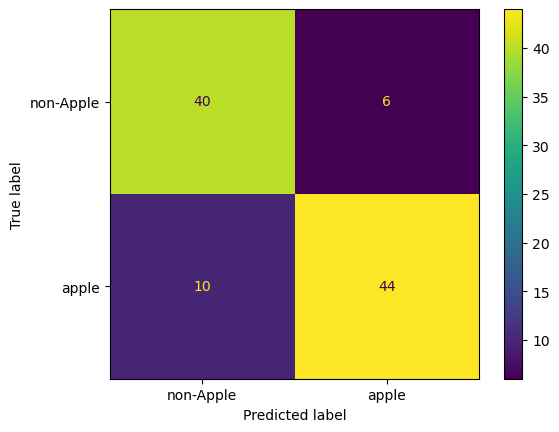

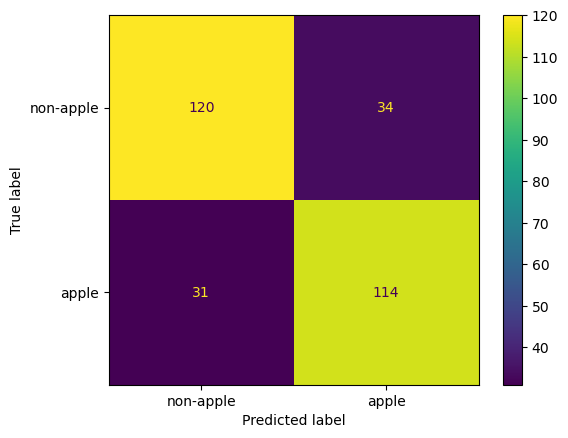

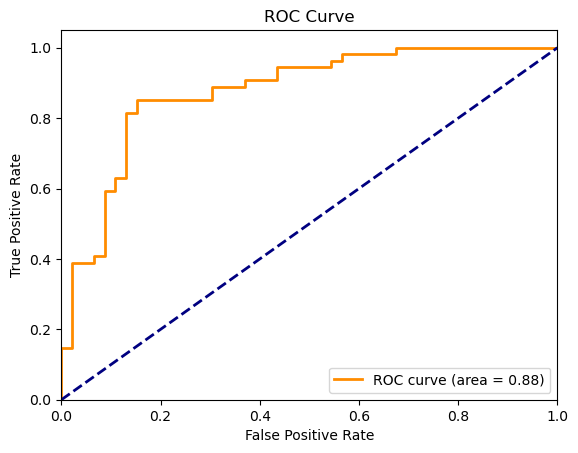

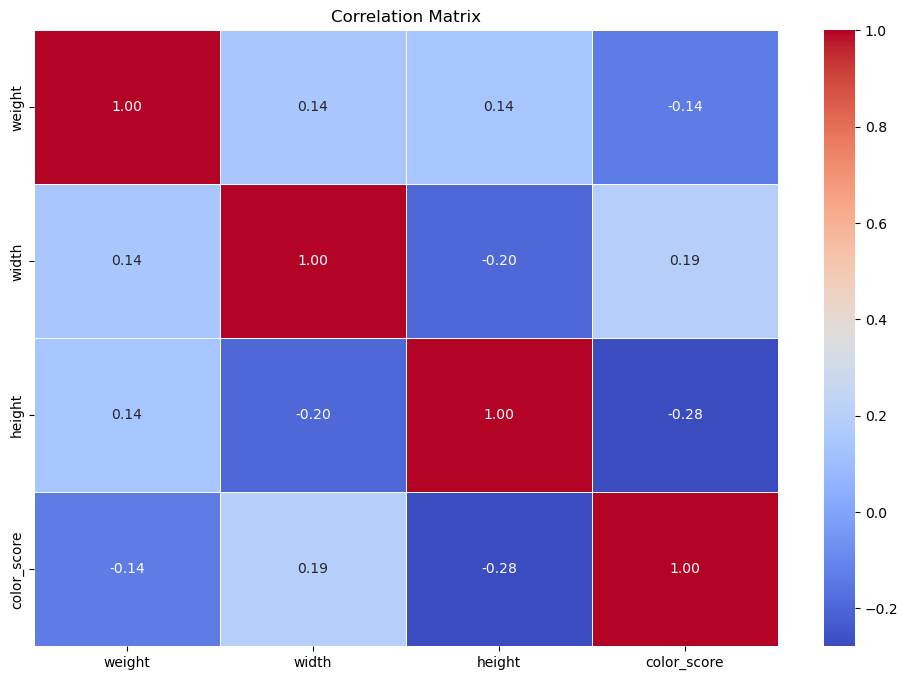

In [27]:
# Fit a binary classifier and quantify its accuracy. 

# Define the features (X) and class vector (y) 
X = dataset[['weight', 'width', 'height', 'color_score']]  
y = dataset['apple_vs_other']  # Target variable: 1 for apple, 0 for non-apple

# Given the total size of the dataset (399 entries) it was decided to leave at least 100 entries for testing. 
# Randomised split (75% for training, 25% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# DECISION TREE CLASSIFIER
#clf= DecisionTreeClassifier(max_depth=100)

# K-NEIGHBORS CLASSIFIER
#clf = KNeighborsClassifier(5)  # 5 neighbors

# SVC CLASSIFIER
#clf = SVC(gamma=0.001, C=100, probability=True)

# RANDOM FOREST CLASSIFIER
#clf = RandomForestClassifier(n_estimators=100, max_depth=100)

# LOGISTIC REGRESSION CLASSIFIER
clf = LogisticRegression(max_iter=1000)

# Fit models 
clf.fit(X_train, y_train)

# Predict and calculate the number of misclassified points
predicted_y_train = clf.predict(X_train)
predicted_y_test = clf.predict(X_test)

# Print the results 
#print("\nDecision Tree ")
#print("\nK-Neighbours ")
#print("\nSVC ")
#print("\nRandom Forest ")
print("\nLogistic Regression ")

print("Number of mislabeled points in the training set: %d" % (y_train != predicted_y_train).sum())
print("Number of mislabeled points in the testing set: %d" % (y_test != predicted_y_test).sum())

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('Training score: ', train_score)
print('Testing score: ', test_score)

# Confusion matrix
disp_test = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=["non-Apple", "apple"])
disp_train = ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, display_labels=["non-apple", "apple"])

# Compute classification metrics
accuracy = accuracy_score(y_test, predicted_y_test)
precision = precision_score(y_test, predicted_y_test)
recall = recall_score(y_test, predicted_y_test)
f1 = f1_score(y_test, predicted_y_test)

# Print results
print("\nClassification Metrics:")
print(f"Accuracy: {accuracy:.4f}") 
print(f"Precision: {precision:.4f}")  
print(f"Recall: {recall:.4f}")  
print(f"F1 Score: {f1:.4f}")  

# ROC curve
y_probs = clf.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

<h4> 3-class Classifier </h4>


Random Forest 
Number of mislabeled points in the training set: 0
Number of mislabeled points in the testing set: 28
Training Accuracy: 1.0000
Testing Accuracy: 0.7200

Confusion Matrix Breakdown:
Apple - TP: 46, FP: 15, FN: 8
Orange - TP: 6, FP: 8, FN: 15
Lemon - TP: 20, FP: 5, FN: 5

Classification Metrics:
Accuracy: 0.7200
Precision: 0.6972
Recall: 0.7200
F1 Score: 0.7040

Classification Metrics for Each Class:
Apple:
  Precision: 0.7541
  Recall: 0.8519
  F1 Score: 0.8000
Orange:
  Precision: 0.4286
  Recall: 0.2857
  F1 Score: 0.3429
Lemon:
  Precision: 0.8000
  Recall: 0.8000
  F1 Score: 0.8000


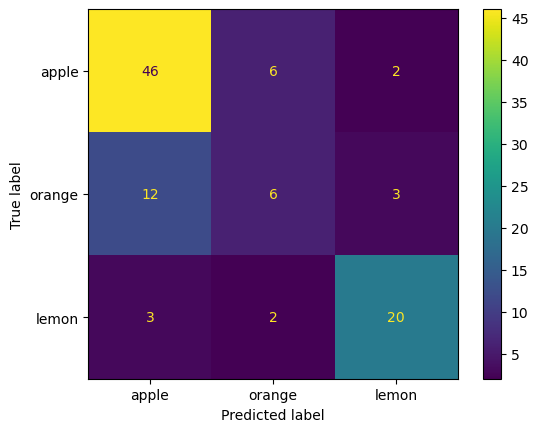

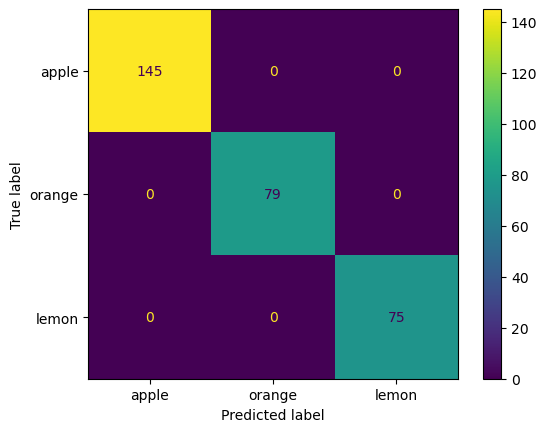

In [29]:
# Fit a 3-class classifier for apples vs. oranges vs. lemons and quantify the classification accuracy. 

# Define the features (X) and class vector (y) 
X = dataset[['weight', 'width', 'height', 'color_score']]  
y = dataset['fruit_label']  # Target variable: 1 for apple, 2 for orange, 3 for lemon

# Given the total size of the dataset (399 entries) it was decided to leave at least 100 entries for testing. 
# Randomised split (75% for training, 25% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# DECISION TREE CLASSIFIER
#clf= DecisionTreeClassifier(max_depth=100)

# K-NEIGHBORS CLASSIFIER
#clf = KNeighborsClassifier(5)  # 5 neighbors

# SVC CLASSIFIER
#clf = SVC(gamma=0.001, C=100, probability=True)

# RANDOM FOREST CLASSIFIER
clf = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=42)

# Fit models 
clf.fit(X_train, y_train)

# Predict and calculate the number of misclassified points
predicted_y_train = clf.predict(X_train)
predicted_y_test = clf.predict(X_test)

#print("\nDecision Tree ")
#print("\nK-Neighbours ")
#print("\nSVC ")
print("\nRandom Forest ")

print("Number of mislabeled points in the training set: %d" % (y_train != predicted_y_train).sum())
print("Number of mislabeled points in the testing set: %d" % (y_test != predicted_y_test).sum())

# Model accuracy on training and testing data
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print(f"Training Accuracy: {train_score:.4f}")
print(f"Testing Accuracy: {test_score:.4f}")

# Compute confusion matrix
cm = confusion_matrix(y_test, predicted_y_test)

# Confusion matrix
disp_test = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=["apple", "orange", "lemon"])
disp_train = ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, display_labels=["apple", "orange", "lemon"])

# Print confusion matrix breakdown
print("\nConfusion Matrix Breakdown:")
print(f"Apple - TP: {cm[0, 0]}, FP: {cm[:, 0].sum() - cm[0, 0]}, FN: {cm[0, :].sum() - cm[0, 0]}")
print(f"Orange - TP: {cm[1, 1]}, FP: {cm[:, 1].sum() - cm[1, 1]}, FN: {cm[1, :].sum() - cm[1, 1]}")
print(f"Lemon - TP: {cm[2, 2]}, FP: {cm[:, 2].sum() - cm[2, 2]}, FN: {cm[2, :].sum() - cm[2, 2]}")

# Compute classification metrics for multi-class
accuracy = accuracy_score(y_test, predicted_y_test)
precision = precision_score(y_test, predicted_y_test, average='weighted')  
recall = recall_score(y_test, predicted_y_test, average='weighted')
f1 = f1_score(y_test, predicted_y_test, average='weighted')

# Print classification metrics
print("\nClassification Metrics:")
print(f"Accuracy: {accuracy:.4f}")  
print(f"Precision: {precision:.4f}")  
print(f"Recall: {recall:.4f}")  
print(f"F1 Score: {f1:.4f}")  

# Classification metrics for each class (apple, orange, lemon)
print("\nClassification Metrics for Each Class:")
for label, name in zip([1, 2, 3], ["Apple", "Orange", "Lemon"]):
    precision_class = precision_score(y_test, predicted_y_test, labels=[label], average='micro')
    recall_class = recall_score(y_test, predicted_y_test, labels=[label], average='micro')
    f1_class = f1_score(y_test, predicted_y_test, labels=[label], average='micro')
    
    print(f"{name}:")
    print(f"  Precision: {precision_class:.4f}")
    print(f"  Recall: {recall_class:.4f}")
    print(f"  F1 Score: {f1_class:.4f}")

<h4> Dyslexia database </h4>

  Dyslexia  TTO  TRO  TNO  RTO  RRO  RNO  NTO  NRO  NNO  TTS  TRS  TNS  RTS  \
0        y   13    3    8    2   15    7    6    6   12    5   12    7    7   
1        y   16    4    4    1   12   11    0   14   10   15    7    2    2   
2        y   15    4    5    3    8   13    4    1   19   12    2   10    7   
3        y   12    6    6    2   11   11    0    6   18   14    5    5    1   
4        y   17    4    3    4    9   11    3    5   16   18    2    4    2   

   RRS  RNS  NTS  NRS  NNS  
0   11    6    8   12    4  
1   14    8    1    8   15  
2    9    8    0    4   20  
3   12   11    1    7   16  
4   15    7    2    9   13  
Dyslexia
n           39
y           32
Name: count, dtype: int64
            TTO        TRO        TNO        RTO        RRO        RNO  \
count  71.00000  71.000000  71.000000  71.000000  71.000000  71.000000   
mean   16.15493   3.084507   4.760563   3.887324   8.338028  11.774648   
std     3.54823   2.611767   3.016454   2.988307   3.876463   4.

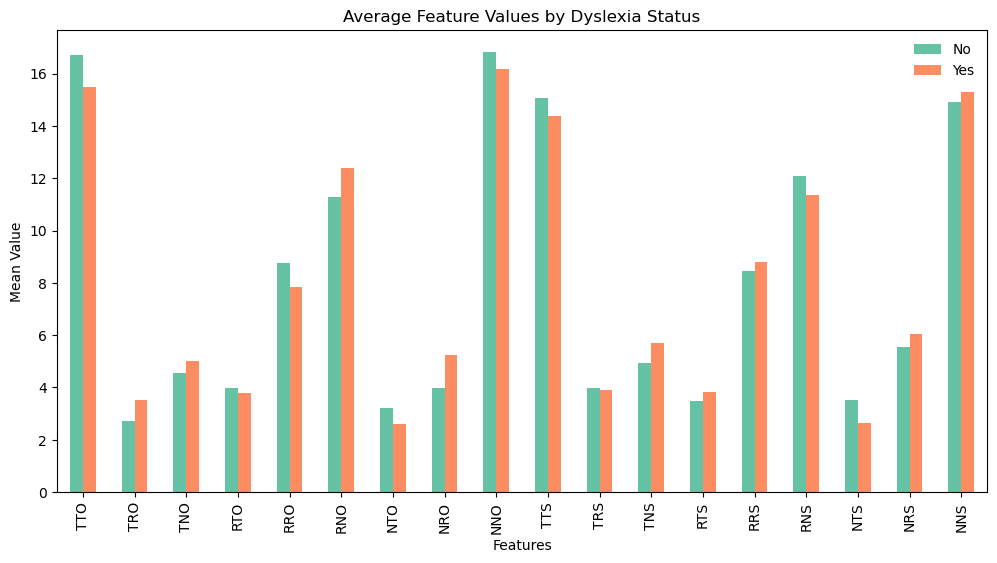

Dyslexia  Dyslexia_num
n         0               39
y         1               32
Name: count, dtype: int64
   Dyslexia_num Dyslexia  TTO  TRO  TNO  RTO  RRO  RNO  NTO  NRO  NNO  TTS  \
0             1        y   13    3    8    2   15    7    6    6   12    5   
1             1        y   16    4    4    1   12   11    0   14   10   15   
2             1        y   15    4    5    3    8   13    4    1   19   12   
3             1        y   12    6    6    2   11   11    0    6   18   14   
4             1        y   17    4    3    4    9   11    3    5   16   18   

   TRS  TNS  RTS  RRS  RNS  NTS  NRS  NNS  
0   12    7    7   11    6    8   12    4  
1    7    2    2   14    8    1    8   15  
2    2   10    7    9    8    0    4   20  
3    5    5    1   12   11    1    7   16  
4    2    4    2   15    7    2    9   13  


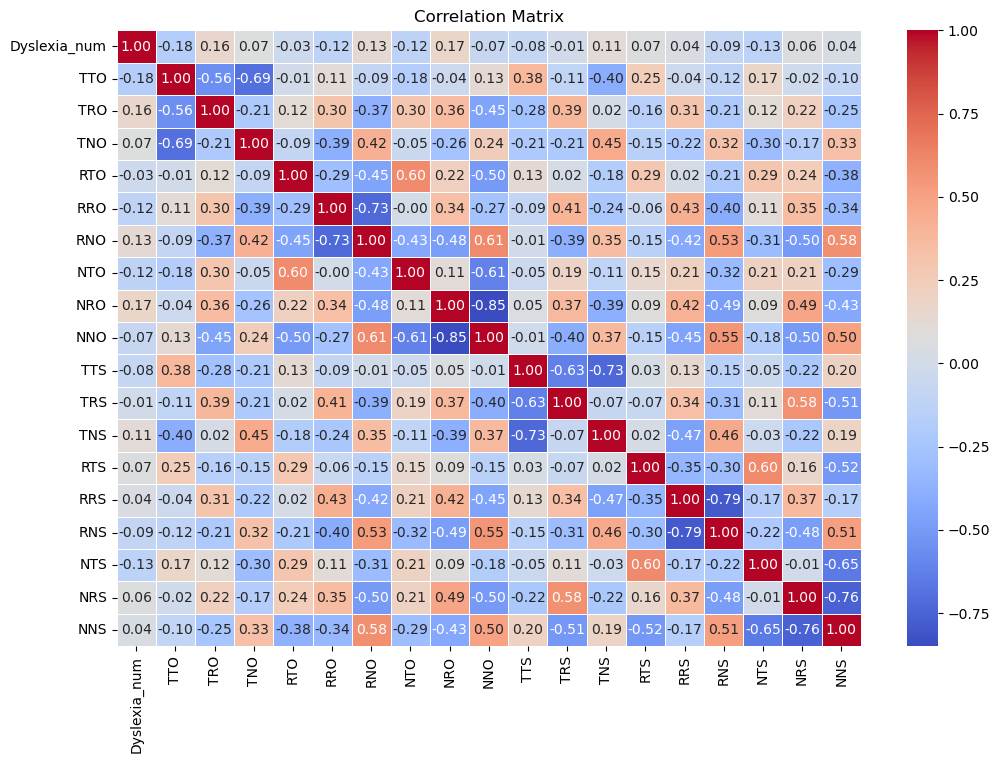

In [62]:
# Dataset 2 (link: https://osf.io/n752f/)

#Loading the dataset
dataset = pd.read_excel('path/to/your/dyslexia.xlsx', engine='openpyxl')  

# Orthographical Conditions 

#TTO - Number of answers ‘the same’ on target in orthographical condition
#TRO - Number of answers ‘related’ on target in orthographical condition
#TNO - Number of answers ‘new’ on target in orthographical condition

#RTO - Number of answers ‘the same’ on related stimuli in orthographical condition
#RRO - Number of answers ‘related’ on related stimuli in orthographical condition
#RNO - Number of answers ‘new’ on related stimuli in orthographical condition

#NTO - Number of answers ‘the same’ on new stimuli in orthographical condition
#NRO - Number of answers ‘related’ on new stimuli in orthographical condition
#NNO - Number of answers ‘new’ on new stimuli in orthographical condition

# Semantical Conditions 

#TTS - Number of answers ‘the same’ on target in semantical condition
#TRS - Number of answers ‘related’ on target in semantical condition
#TNS - Number of answers ‘new’ on target in semantical condition

#RTS - Number of answers ‘the same’ on related stimuli in semantical condition
#RRS - Number of answers ‘related’ on related stimuli in semantical condition
#RNS - Number of answers ‘new’ on related stimuli in semantical condition

#NTS - Number of answers ‘the same’ on new stimuli in semantical condition
#NRS - Number of answers ‘related’ on new stimuli in semantical condition
#NNS - Number of answers ‘new’ on new stimuli in semantical condition

# Exploring the dataset
print(dataset.head())  

# Tabulate discrete variables (Dyslexia)
print(dataset[['Dyslexia']].value_counts())  

# Summarize continuous variables
print(dataset.iloc[:, 1:].describe())  

# Summarize continuous variables by Dyslexia
print(dataset.groupby('Dyslexia').mean())  

# Plot 
# Set the color palette to Set2
palette = sns.color_palette("Set2", 2)  # Only two colors for the 'No' and 'Yes' categories

# Plot
dataset_grouped = dataset.groupby("Dyslexia").mean().T
ax = dataset_grouped.plot(kind="bar", figsize=(12, 6), color=palette)
plt.title("Average Feature Values by Dyslexia Status")
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.xticks(rotation=90)
plt.legend(labels=['No', 'Yes'], frameon=False, loc="upper right")
plt.show()

# Creating a numeric variable based on Dyslexia and checking
dataset['Dyslexia_num'] = dataset['Dyslexia'].apply(lambda x: 1 if x == 'y' else 0)
print(dataset[['Dyslexia', 'Dyslexia_num']].value_counts())  

# Reorder columns to bring 'Dyslexia_num' to the front
cols = ['Dyslexia_num'] + [col for col in dataset.columns if col != 'Dyslexia_num']
dataset = dataset[cols]

# Display the dataset to verify the column order
print(dataset.head())

# CORRELATION MATRIX 
# Select only numeric columns for the correlation matrix
numeric_columns = dataset.select_dtypes(include=['number']).columns

# Calculate the correlation matrix using only numeric columns
corr_matrix = dataset[numeric_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Index(['Dyslexia_num', 'Dyslexia', 'TTO', 'TRO', 'TNO', 'RTO', 'RRO', 'RNO',
       'NTO', 'NRO', 'NNO', 'TTS', 'TRS', 'TNS', 'RTS', 'RRS', 'RNS', 'NTS',
       'NRS', 'NNS'],
      dtype='object')


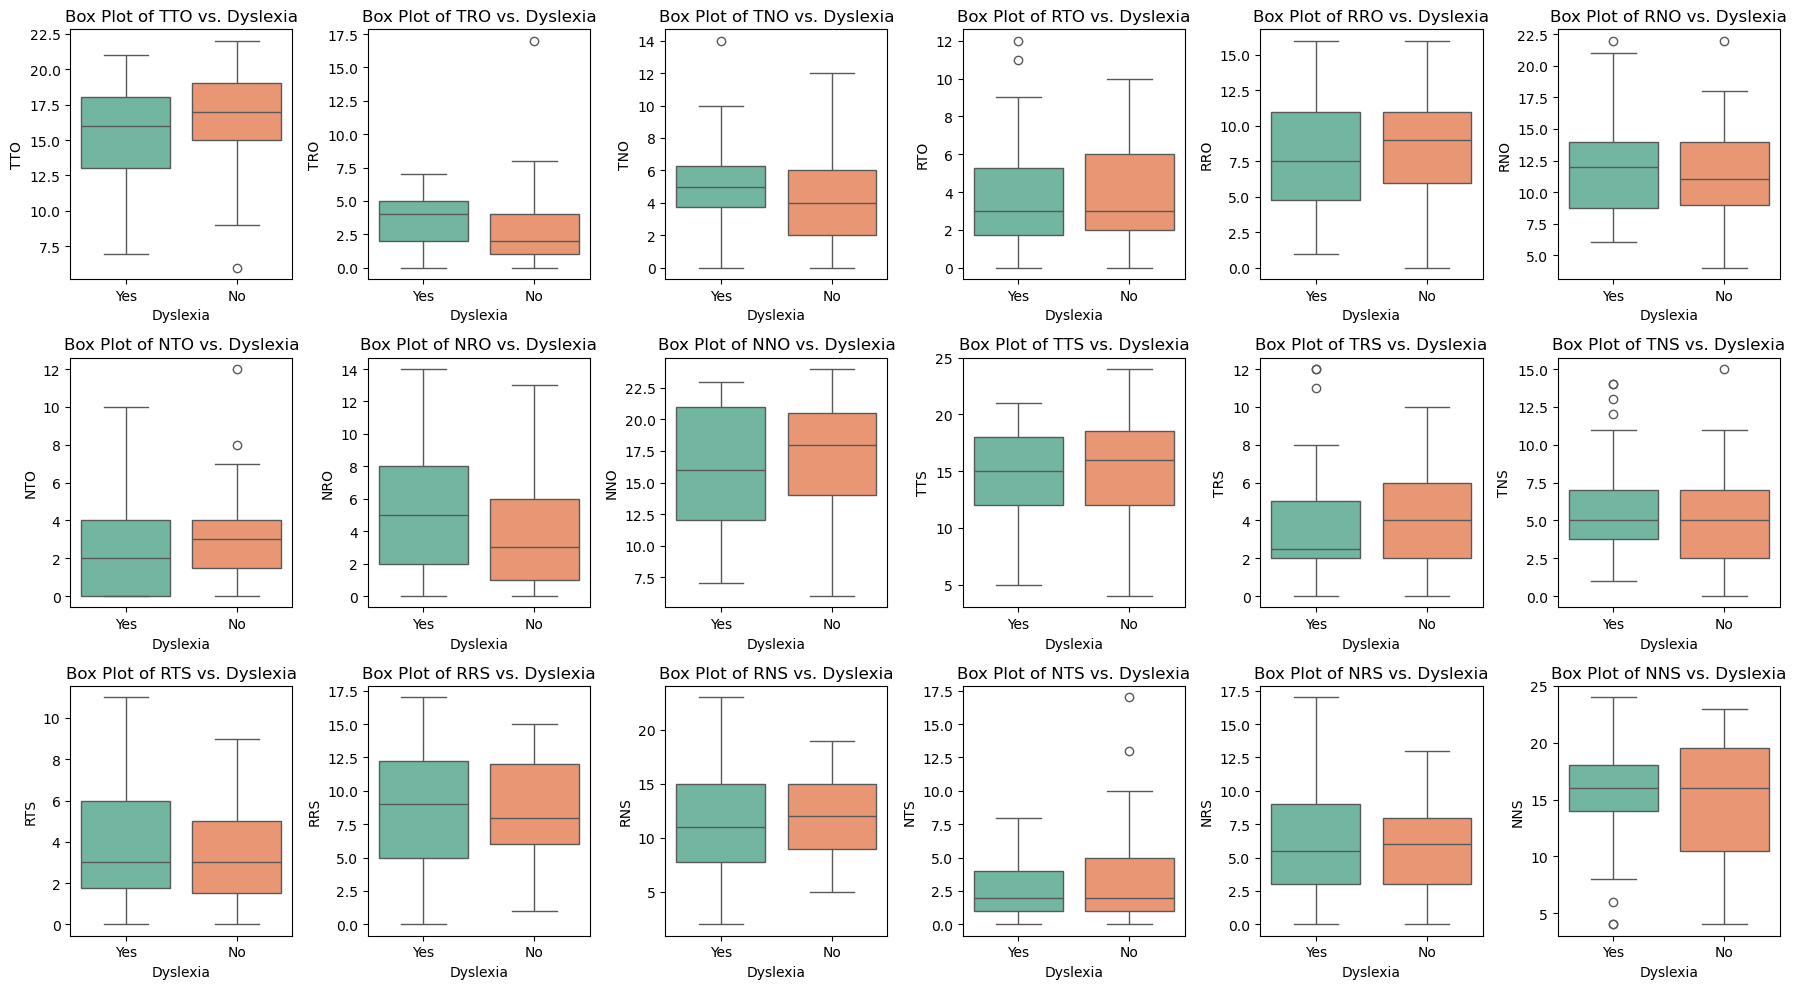

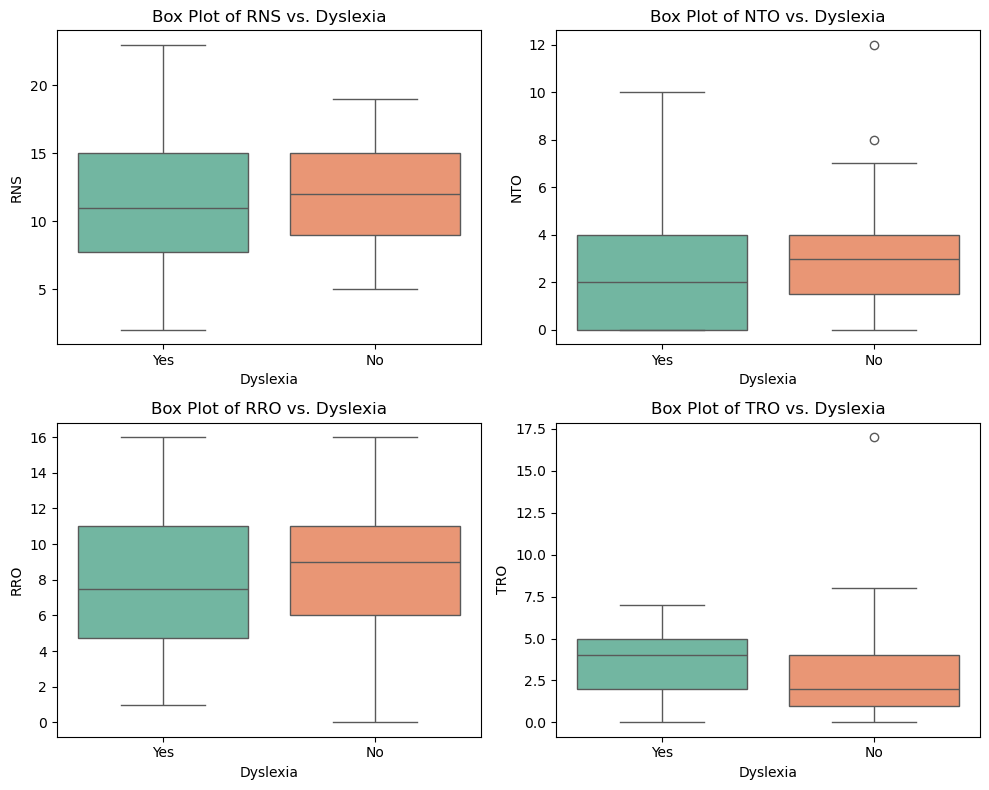

In [41]:
column_names = dataset.columns
print(column_names)

#BOXPLOTS 
# Get the list of all feature columns, excluding both 'Dyslexia_num' and 'Dyslexia'
features = [col for col in dataset.columns if col not in ['Dyslexia_num', 'Dyslexia']]

# Create a 3x6 grid of subplots (3 rows, 6 columns)
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(18, 10))

# Flatten the 2D axes array for easy iteration
axes = axes.flatten()

# Loop over the features and plot box plots for each feature vs. Dyslexia
for i, feature in enumerate(features):
    sns.boxplot(data=dataset, x='Dyslexia', y=feature, ax=axes[i], hue='Dyslexia', palette='Set2', legend=False)
    axes[i].set_title(f'Box Plot of {feature} vs. Dyslexia')
    axes[i].set_xlabel('Dyslexia')
    axes[i].set_ylabel(feature)
    
    # Update the x-axis labels to 'Yes' and 'No' directly
    axes[i].set_xticks([0, 1])  # Explicitly set tick positions
    axes[i].set_xticklabels(['Yes', 'No'])  # Now update labels without warning

# Adjust layout so everything fits well
plt.tight_layout()
plt.show()

#BOXPLOTS -  4 SELECTED 
# Assuming `dataset` is your dataframe
features = ['RNS', 'NTO', 'RRO', 'TRO']

# Create a 2x2 grid of subplots (2 rows, 2 columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten the 2D axes array for easy iteration
axes = axes.flatten()

# Loop over the features and plot box plots for each feature vs. Dyslexia
for i, feature in enumerate(features):
    sns.boxplot(data=dataset, x='Dyslexia', y=feature, ax=axes[i], hue='Dyslexia', palette='Set2', legend=False)
    axes[i].set_title(f'Box Plot of {feature} vs. Dyslexia')
    axes[i].set_xlabel('Dyslexia')
    axes[i].set_ylabel(feature)
    
    # Update the x-axis labels to 'Yes' and 'No' directly
    axes[i].set_xticks([0, 1])  # Explicitly set tick positions
    axes[i].set_xticklabels(['Yes', 'No'])  # Now update labels without warning

# Adjust layout so everything fits well
plt.tight_layout()
plt.show()

<h4>Binary Classifier</h4>


Decision Tree 
Number of mislabeled points in the training set: 0
Number of mislabeled points in the testing set: 6
Training score:  1.0
Testing score:  0.6666666666666666

Classification Metrics:
Accuracy: 0.6667
Precision: 0.7000
Recall: 0.7000
F1 Score: 0.7000


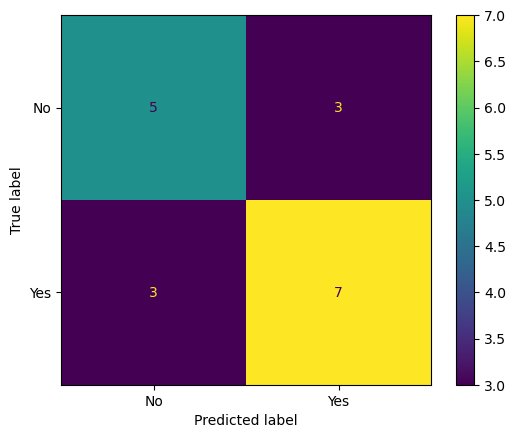

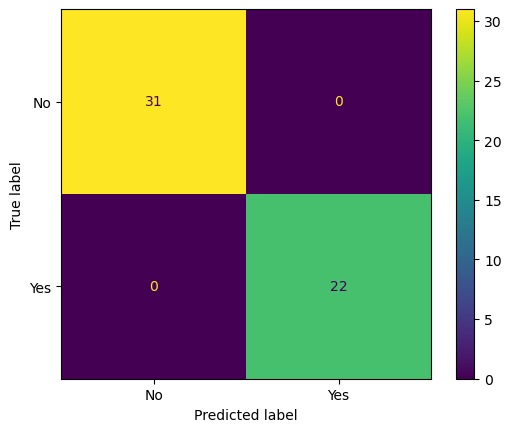

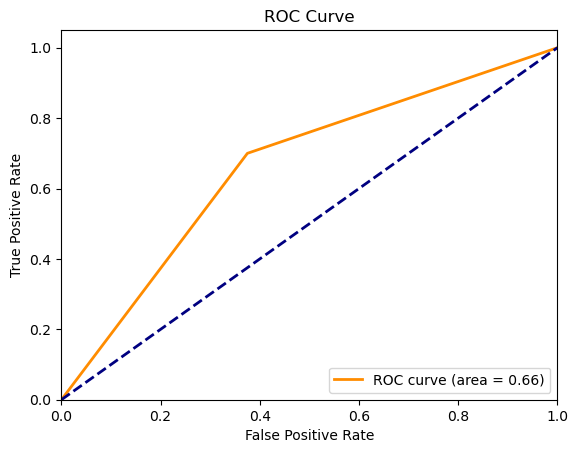

In [78]:
# Fit a binary classifier and quantify its accuracy

# Select features (excluding 'Dyslexia' column and the newly created 'Dyslexia_num' target column)
#X = dataset.drop(columns=['Dyslexia', 'Dyslexia_num'])
X = dataset[['RNS', 'NTO', 'RRO', 'TRO']]
y = dataset['Dyslexia_num']

# Split the data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# DECISION TREE CLASSIFIER
clf= DecisionTreeClassifier(max_depth=100, random_state=42)

# K-NEIGHBORS CLASSIFIER
#clf = KNeighborsClassifier(5)  

# SVC CLASSIFIER
#clf = SVC(gamma=0.001, C=100, probability=True)

# RANDOM FOREST CLASSIFIER
#clf = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=42)

# LOGISTIC REGRESSION CLASSIFIER
#clf = LogisticRegression(max_iter=1000)

# Fit models 
clf.fit(X_train, y_train)

# Predict and calculate the number of misclassified points
predicted_y_train = clf.predict(X_train)
predicted_y_test = clf.predict(X_test)

# Print the results 
print("\nDecision Tree ")
#print("\nK-Neighbours ")
#print("\nSVC ")
#print("\nRandom Forest ")
#print("\nLogistic Regression ")

print("Number of mislabeled points in the training set: %d" % (y_train != predicted_y_train).sum())
print("Number of mislabeled points in the testing set: %d" % (y_test != predicted_y_test).sum())

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('Training score: ', train_score)
print('Testing score: ', test_score)

# Confusion matrix
disp_test = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['No', 'Yes'])
disp_train = ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, display_labels=['No', 'Yes'])

# Compute classification metrics
accuracy = accuracy_score(y_test, predicted_y_test)
precision = precision_score(y_test, predicted_y_test)
recall = recall_score(y_test, predicted_y_test)
f1 = f1_score(y_test, predicted_y_test)

# Print results
print("\nClassification Metrics:")
print(f"Accuracy: {accuracy:.4f}") 
print(f"Precision: {precision:.4f}")  
print(f"Recall: {recall:.4f}")  
print(f"F1 Score: {f1:.4f}")  

# ROC curve
y_probs = clf.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# The Logistic Regression on all variables gave this result
#Number of mislabeled points in the training set: 11
#Number of mislabeled points in the testing set: 10
#Training score:  0.7924528301886793
#Testing score:  0.4444444444444444